# Battle of the Bakers
## Applied Data Science Capstone
### By: Kristen Vrionis

### Table of Contents:

1. Introduction
2. Target Audience
3. Data Overview
4. Methodology
5. Discussion
6. Conclusion

In [332]:
#installing folium
try:
    print("Installing Folium...\n")
    !conda install -c conda-forge folium=0.5.0 --yes
    print("Folium has been successfully installed!\n")
except:
    print("ERROR: could not install Folium!\n")

Installing Folium...

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt

Folium has been successfully installed!



In [333]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import os
import folium # map rendering library
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
import ssl
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [524]:
# The code was removed by Watson Studio for sharing.

TypeError: 'tuple' object is not callable

In [335]:
df_data_2.rename(columns={'Name': 'Neighborhood'}, inplace=True)

df_data_2.head()

,Neighborhood,Type,County,Population (2010),Square Miles
0,Alameda,City,Alameda,73812,1.79
1,Albany,City,Alameda,18539,4.84
2,American Canyon,City,Napa,19454,28.35
3,Antioch,City,Contra Costa,102372,5.02
4,Atherton,Town,San Mateo,6914,4.62


In [336]:
df_n = df_data_2.drop(["Type", "County", "Population (2010)", "Square Miles"], axis=1)
df_n.head()

,Neighborhood
0,Alameda
1,Albany
2,American Canyon
3,Antioch
4,Atherton


In [337]:
mylist = df_n.values.tolist()
mylist = [x[0] for x in mylist]
print(mylist)

['Alameda', 'Albany', 'American Canyon', 'Antioch', 'Atherton', 'Belmont', 'Belvedere', 'Benicia', 'Berkeley', 'Brentwood', 'Brisbane', 'Burlingame', 'Calistoga', 'Campbell', 'Clayton', 'Cloverdale', 'Colma', 'Concord', 'Corte Madera', 'Cotati', 'Cupertino', 'Daly City', 'Danville', 'Dixon', 'Dublin', 'East Palo Alto', 'El Cerrito', 'Emeryville', 'Fairfax', 'Fairfield', 'Foster City', 'Fremont', 'Gilroy', 'Half Moon Bay', 'Hayward', 'Healdsburg', 'Hercules', 'Hillsborough', 'Lafayette', 'Larkspur', 'Livermore', 'Los Altos', 'Los Altos Hills', 'Los Gatos', 'Martinez', 'Menlo Park', 'Mill Valley', 'Millbrae', 'Milpitas', 'Monte Sereno', 'Moraga', 'Morgan Hill', 'Mountain View', 'Napa', 'Newark', 'Novato', 'Oakland', 'Oakley', 'Orinda', 'Pacifica', 'Palo Alto', 'Petaluma', 'Piedmont', 'Pinole', 'Pittsburg', 'Pleasant Hill', 'Pleasanton', 'Portola Valley', 'Redwood City', 'Richmond', 'Rio Vista', 'Rohnert Park', 'Ross', 'St. Helena', 'San Anselmo', 'San Bruno', 'San Carlos', 'San Francisco

In [338]:
State = []
for x in mylist:
    ST = "California"
    State.append(ST)
    
df_addr = pd.DataFrame(
    {'State': State, 
     'Neighborhood' : mylist})
     
df_addr.head()

df_citystate = df_addr
df_citystate['City, State'] = df_addr[['Neighborhood', 'State']].apply(lambda x: ', '.join(x), axis=1 )
df_citystate.head(12)

,State,Neighborhood,"City, State"
0,California,Alameda,"Alameda, California"
1,California,Albany,"Albany, California"
2,California,American Canyon,"American Canyon, California"
3,California,Antioch,"Antioch, California"
4,California,Atherton,"Atherton, California"
5,California,Belmont,"Belmont, California"
6,California,Belvedere,"Belvedere, California"
7,California,Benicia,"Benicia, California"
8,California,Berkeley,"Berkeley, California"
9,California,Brentwood,"Brentwood, California"


In [339]:
df_citystate = df_citystate.drop(["State", "Neighborhood"], axis=1)
df_citystate.head()

,"City, State"
0,"Alameda, California"
1,"Albany, California"
2,"American Canyon, California"
3,"Antioch, California"
4,"Atherton, California"


In [340]:
mylist2 = df_citystate.values.tolist()
mylist2 = [x[0] for x in mylist2]
print(mylist2)

['Alameda, California', 'Albany, California', 'American Canyon, California', 'Antioch, California', 'Atherton, California', 'Belmont, California', 'Belvedere, California', 'Benicia, California', 'Berkeley, California', 'Brentwood, California', 'Brisbane, California', 'Burlingame, California', 'Calistoga, California', 'Campbell, California', 'Clayton, California', 'Cloverdale, California', 'Colma, California', 'Concord, California', 'Corte Madera, California', 'Cotati, California', 'Cupertino, California', 'Daly City, California', 'Danville, California', 'Dixon, California', 'Dublin, California', 'East Palo Alto, California', 'El Cerrito, California', 'Emeryville, California', 'Fairfax, California', 'Fairfield, California', 'Foster City, California', 'Fremont, California', 'Gilroy, California', 'Half Moon Bay, California', 'Hayward, California', 'Healdsburg, California', 'Hercules, California', 'Hillsborough, California', 'Lafayette, California', 'Larkspur, California', 'Livermore, Cali

In [528]:
!pip list --isolated

Package                            Version  
---------------------------------- ---------
absl-py                            0.7.0    
alabaster                          0.7.12   
altair                             4.1.0    
anaconda-client                    1.7.2    
anaconda-project                   0.8.2    
arcgis                             1.6.0    
asn1crypto                         0.24.0   
astor                              0.7.1    
astroid                            2.1.0    
astropy                            3.1.1    
astunparse                         1.6.2    
atomicwrites                       1.3.0    
attrs                              18.2.0   
autoai-libs                        1.10.5   
Babel                              2.6.0    
backcall                           0.1.0    
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
beautifulsoup4                     4.7.1    
biopython                          1.72     
bitarray  

In [530]:
x=0
long = []
lat = []
geolocator = Nominatim(user_agent="my-application")


for x in mylist:
    location = geolocator.geocode(x)
    lati = location.latitude
    lat.append(lati)
    longi = location.longitude
    long.append(longi)


In [531]:
print(len(long))
print(len(lat))
print(len(mylist2))
print(len(mylist))

101
101
101
101


In [532]:
# make dataframe with lat and long coordinates
df_cord = pd.DataFrame(
    {"Neighborhood" : mylist,
    'Map Name': mylist2, 
     'Longitude' : long, 
     'Latitude': lat,
    })
df_cord.head()

,Neighborhood,Map Name,Longitude,Latitude
0,Alameda,"Alameda, California",-121.899142,37.609029
1,Albany,"Albany, California",-73.754968,42.651167
2,American Canyon,"American Canyon, California",-122.227043,38.223457
3,Antioch,"Antioch, California",-121.805789,38.004921
4,Atherton,"Atherton, California",-122.197743,37.461327


In [533]:
# merge long and lat dataframe to the original dataframe
data_merge = pd.merge(df_data_2, df_cord, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

print(data_merge.shape)
data_merge.head(12)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [534]:
data_merge['Pop/SqMi'] = data_merge['Population (2010)']/data_merge['Square Miles']
data_merge.head()

,Neighborhood,Type,County,Population (2010),Square Miles,Map Name,Longitude,Latitude,Pop/SqMi
0,Alameda,City,Alameda,73812,1.79,"Alameda, California",-121.899142,37.609029,41235.754190
1,Albany,City,Alameda,18539,4.84,"Albany, California",-73.754968,42.651167,3830.371901
2,American Canyon,City,Napa,19454,28.35,"American Canyon, California",-122.227043,38.223457,686.208113
3,Antioch,City,Contra Costa,102372,5.02,"Antioch, California",-121.805789,38.004921,20392.828685
4,Atherton,Town,San Mateo,6914,4.62,"Atherton, California",-122.197743,37.461327,1496.536797


In [ ]:
#data_sums = data_merge.groupby('County').sum()

data_sums = data_merge.sort_values('Neighborhood')
data_sums

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10,5), dpi = 100)
# title
plt.title('Number of People in Bay Area Counties')
#On x-axis
plt.xlabel('County', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
data_merge.groupby('County')['Population (2010)'].sum().plot(kind='bar')
#legend
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10,5), dpi = 100)
# title
plt.title('Area of Bay Area Counties')
#On x-axis
plt.xlabel('County', fontsize = 15)
#On y-axis
plt.ylabel('Square Miles', fontsize=15)
#giving a bar plot
data_merge.groupby('County')['Square Miles'].sum().plot(kind='bar')
#legend
plt.legend()
plt.show()

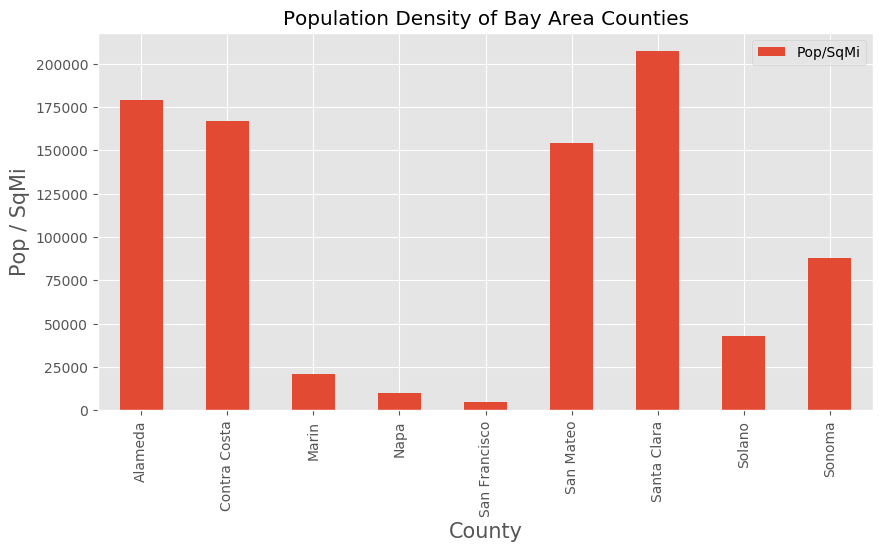

In [525]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10,5), dpi = 100)
# title
plt.title('Population Density of Bay Area Counties')
#On x-axis
plt.xlabel('County', fontsize = 15)
#On y-axis
plt.ylabel('Pop / SqMi', fontsize=15)
#giving a bar plot
data_merge.groupby('County')['Pop/SqMi'].sum().plot(kind='bar')
#legend
plt.legend()
plt.show()

In [ ]:
!pip list --isolated

In [ ]:
# latitude and longtitude are found via google search
sf_lat = 37.7749; sf_long = -122.4194
map_of_sf = folium.Map(location = [sf_lat, sf_long], zoom_start = 10.7)
print("Map is set")

In [ ]:
# add markers to map
for lat, lng, neighborhood in zip(data_merge['Latitude'], data_merge['Longitude'], data_merge['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_of_sf)  

map_of_sf

Cleo's cookies wants to open their first store to be in a densely populated area. Therefore, the three counties selected for the remainder of the analysis are: Santa Clara, San Mateo, and Alameda counties. 

In [535]:
#filter counties to only show cities that are in the top 3 most population dense counties

counties = ["Alameda", "Santa Clara", "San Mateo"]
boolean_series = data_merge.County.isin(counties)
penn_map_df = data_merge[boolean_series]

print(penn_map_df.shape)

(49, 9)


In [536]:
penn_map_df_sorted = penn_map_df.sort_values('Longitude')

penn_map_df_sorted.head(20)

,Neighborhood,Type,County,Population (2010),Square Miles,Map Name,Longitude,Latitude,Pop/SqMi
59,Pacifica,City,San Mateo,37234,23.88,"Pacifica, California",-122.486919,37.613825,1559.212730
21,Daly City,City,San Mateo,101123,18.03,"Daly City, California",-122.472671,37.690483,5608.596783
16,Colma,Town,San Mateo,1792,30.55,"Colma, California",-122.459695,37.676878,58.657938
74,San Bruno,City,San Mateo,41114,5.54,"San Bruno, California",-122.411084,37.630490,7421.299639
89,South San Francisco,City,San Mateo,63632,4.11,"South San Francisco, California",-122.408125,37.654949,15482.238443
47,Millbrae,City,San Mateo,21532,13.59,"Millbrae, California",-122.387194,37.598547,1584.400294
11,Burlingame,City,San Mateo,28806,2.60,"Burlingame, California",-122.366083,37.584103,11079.230769
79,San Mateo,City,San Mateo,97207,2.63,"San Mateo, California",-122.333057,37.496904,36960.836502
27,Emeryville,City,Alameda,10080,2.20,"Emeryville, California",-122.286527,37.831409,4581.818182
8,Berkeley,City,Alameda,112580,14.79,"Berkeley, California",-122.272864,37.870839,7611.899932


In [537]:
# latitude and longtitude are found via google search
pa_lat = 37.4419; pa_long = -122.1430
penn_map = folium.Map(location = [pa_lat, pa_long], zoom_start = 10.7)
print("Map is set")

Map is set


In [538]:
for lat, lng, neighborhood in zip(penn_map_df['Latitude'], penn_map_df['Longitude'], penn_map_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(penn_map)  

penn_map

Getting Foursquare data

In [ ]:
# The code was removed by Watson Studio for sharing.

Do Foursquare Data by County

In [342]:
#Alameda County
address_sf = 'Oakland, CA'
sf_lat = 37.8044; sf_long = -122.2712

In [343]:
LIMIT_sf = 2000
radius_sf = 10000
url_sf = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, sf_lat, sf_long, VERSION, radius_sf, LIMIT_sf)


In [344]:
results_sf = requests.get(url_sf).json()


In [345]:
def get_category_type_sf(row):
    try:
        categories_list_sf = row['categories']
    except:
        categories_list_sf = row['venue.categories']
        
    if len(categories_list_sf) == 0:
        return None
    else:
        return categories_list_sf[0]['name']


In [346]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues_sf = results_sf['response']['groups'][0]['items']  
nearby_venues_sf = json_normalize(venues_sf) # flatten JSON

In [347]:
# filter columns
filtered_columns_sf = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_sf =nearby_venues_sf.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_sf['venue.categories'] = nearby_venues_sf.apply(get_category_type_sf, axis=1)

# clean columns
nearby_venues_sf.columns = [col.split(".")[-1] for col in nearby_venues_sf.columns]

nearby_venues_sf.head(10)

,name,categories,lat,lng
0,Fox Theater,Music Venue,37.808136,-122.270670
1,Lucky Duck Bicycle Cafe,Café,37.801684,-122.268656
2,Oaklandish,Clothing Store,37.805075,-122.270726
3,Abura-Ya,Japanese Restaurant,37.805959,-122.267693
4,Cape & Cowl,Comic Shop,37.806725,-122.272747
5,Woods Bar & Brewery,Brewery,37.806889,-122.270415
6,Cosecha,Mexican Restaurant,37.801607,-122.274889
7,Bar Shiru,Bar,37.806378,-122.270393
8,Mad Oak Bar,Bar,37.799976,-122.264732
9,Cookiebar Creamery,Ice Cream Shop,37.800835,-122.275576


In [348]:
print('{} venues in Alameda County were returned by Foursquare.'.format(nearby_venues_sf.shape[0]))

100 venues in Alameda County were returned by Foursquare.


In [349]:
#San Mateo County
address_SM = 'San Mateo, CA'
sm_lat = 37.4337; sm_long = -122.4014

LIMIT_sm = 200
radius_sm = 10000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, sm_lat, sm_long, VERSION, radius_sm, LIMIT_sm)

results_sm = requests.get(url).json()


In [350]:
def get_category_type_sm(row):
    try:
        categories_list_sm = row['categories']
    except:
        categories_list_sm = row['venue.categories']
        
    if len(categories_list_sm) == 0:
        return None
    else:
        return categories_list_sm[0]['name']

In [351]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues_sm = results_sm['response']['groups'][0]['items']  
nearby_venues_sm = json_normalize(venues_sm) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_sm =nearby_venues_sm.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_sm['venue.categories'] = nearby_venues_sm.apply(get_category_type_sm, axis=1)

# clean columns
nearby_venues_sm.columns = [col.split(".")[-1] for col in nearby_venues_sm.columns]

nearby_venues_sm.head(10)

,name,categories,lat,lng
0,Cowell Ranch Beach & Trailhead,Beach,37.422111,-122.426316
1,Manhattan Beach,Beach,37.429879,-122.439988
2,"The Ritz-Carlton, Half Moon Bay",Resort,37.433845,-122.441443
3,Oddyssea,Miscellaneous Shop,37.462392,-122.429271
4,Poplar State Beach,Beach,37.455297,-122.444848
5,The Ocean Course,Golf Course,37.434801,-122.440213
6,The San Benito Deli,Deli / Bodega,37.464852,-122.429177
7,The Spa,Spa,37.434000,-122.441495
8,Dad's Luncheonette,Burger Joint,37.465881,-122.433359
9,The Ocean Terrace,Lounge,37.433686,-122.441825


In [352]:
print('{} venues in San Mateo County were returned by Foursquare.'.format(nearby_venues_sm.shape[0]))

100 venues in San Mateo County were returned by Foursquare.


In [353]:
#Santa Clara County
address_SC = 'Santa Clara, CA'
sc_lat = 37.3337; sc_long = -121.8907

LIMIT_sc = 200
radius_sc = 10000
url_sc = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, sc_lat, sc_long, VERSION, radius_sc, LIMIT_sc)

results_sc = requests.get(url_sc).json()


In [354]:
def get_category_type_sc(row):
    try:
        categories_list_sc = row['categories']
    except:
        categories_list_sc = row['venue.categories']
        
    if len(categories_list_sc) == 0:
        return None
    else:
        return categories_list_sc[0]['name']

In [355]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues_sc = results_sc['response']['groups'][0]['items']  
nearby_venues_sc = json_normalize(venues_sc) # flatten JSON

# filter columns
filtered_columns_sc = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_sc =nearby_venues_sc.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_sc['venue.categories'] = nearby_venues_sc.apply(get_category_type_sc, axis=1)

# clean columns
nearby_venues_sc.columns = [col.split(".")[-1] for col in nearby_venues_sc.columns]

nearby_venues_sc.head(10)

,name,categories,lat,lng
0,Silicon Valley Capital Club,Restaurant,37.333945,-121.889317
1,San Pedro Square Market,Food Court,37.336480,-121.894403
2,San Pedro Square,Plaza,37.335179,-121.893044
3,California Theatre,Opera House,37.330659,-121.887356
4,The Studio Climbing & Fitness,Climbing Gym,37.330273,-121.886095
5,San Pedro Square Market Bar,Bar,37.336492,-121.894386
6,Ike's Sandwiches,Sandwich Place,37.336852,-121.889436
7,Yogurtland,Frozen Yogurt Shop,37.333020,-121.884331
8,Whole Foods Market,Grocery Store,37.332086,-121.904623
9,Haberdasher,Cocktail Bar,37.330026,-121.886239


In [356]:
print('{} venues in Santa Clara County were returned by Foursquare.'.format(nearby_venues_sc.shape[0]))

100 venues in Santa Clara County were returned by Foursquare.


In [357]:
penn_venues1 = nearby_venues_sc.append(nearby_venues_sf)

print(penn_venues1.head())
print(penn_venues1.shape)

                            name    categories        lat         lng
0    Silicon Valley Capital Club    Restaurant  37.333945 -121.889317
1        San Pedro Square Market    Food Court  37.336480 -121.894403
2               San Pedro Square         Plaza  37.335179 -121.893044
3             California Theatre   Opera House  37.330659 -121.887356
4  The Studio Climbing & Fitness  Climbing Gym  37.330273 -121.886095
(200, 4)


In [358]:
penn_venues = penn_venues1.append(nearby_venues_sm)

print(penn_venues.head())
print(penn_venues.shape)

                            name    categories        lat         lng
0    Silicon Valley Capital Club    Restaurant  37.333945 -121.889317
1        San Pedro Square Market    Food Court  37.336480 -121.894403
2               San Pedro Square         Plaza  37.335179 -121.893044
3             California Theatre   Opera House  37.330659 -121.887356
4  The Studio Climbing & Fitness  Climbing Gym  37.330273 -121.886095
(300, 4)


In [359]:
venues = penn_venues.drop_duplicates(subset=None, keep= False, inplace=False)

print(venues.head())
print(venues.shape)

                            name    categories        lat         lng
0    Silicon Valley Capital Club    Restaurant  37.333945 -121.889317
1        San Pedro Square Market    Food Court  37.336480 -121.894403
2               San Pedro Square         Plaza  37.335179 -121.893044
3             California Theatre   Opera House  37.330659 -121.887356
4  The Studio Climbing & Fitness  Climbing Gym  37.330273 -121.886095
(300, 4)


In [360]:
#get SF County Venues

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT_sf)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

pennisula_venues = getNearbyVenues(names=penn_map_df_sorted['Map Name'],
                                   latitudes=penn_map_df_sorted['Latitude'],
                                   longitudes=penn_map_df_sorted['Longitude']
                                  )

Pacifica, California
Daly City, California
Colma, California
San Bruno, California
South San Francisco, California
Millbrae, California
Burlingame, California
San Mateo, California
Emeryville, California
Berkeley, California
Oakland, California
Foster City, California
San Carlos, California
Woodside, California
Redwood City, California
Piedmont, California
Portola Valley, California
Atherton, California
Menlo Park, California
Palo Alto, California
San Leandro, California
East Palo Alto, California
Los Altos Hills, California
Mountain View, California
Union City, California
Hayward, California
Sunnyvale, California
Cupertino, California
Saratoga, California
Monte Sereno, California
Fremont, California
Los Gatos, California
Milpitas, California
Alameda, California
San Jose, California
Pleasanton, California
Livermore, California
Santa Clara, California
Morgan Hill, California
Gilroy, California
Half Moon Bay, California
Campbell, California
Hillsborough, California
Newark, California
Alb

In [361]:
pennisula_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Pacifica, California",37.613825,-122.486919,P-Town Cafe,37.613687,-122.487075,Coffee Shop
1,"Pacifica, California",37.613825,-122.486919,Gorilla Barbecue,37.613185,-122.487757,BBQ Joint
2,"Pacifica, California",37.613825,-122.486919,Guerrero’s Taqueria,37.613303,-122.486710,Taco Place
3,"Pacifica, California",37.613825,-122.486919,Shelldance Orchid Gardens,37.616762,-122.483615,Garden
4,"Pacifica, California",37.613825,-122.486919,Vallemar Station,37.613325,-122.487379,Steakhouse
5,"Pacifica, California",37.613825,-122.486919,Pacifica's Liberty Garden,37.613834,-122.487393,Garden
6,"Pacifica, California",37.613825,-122.486919,Yonder Shop,37.613129,-122.487244,Gift Shop
7,"Pacifica, California",37.613825,-122.486919,Sun Valley Market,37.613544,-122.486420,Grocery Store
8,"Daly City, California",37.690483,-122.472671,In-N-Out Burger,37.688125,-122.472093,Fast Food Restaurant
9,"Daly City, California",37.690483,-122.472671,Bad Axe Throwing,37.689216,-122.469239,Athletics & Sports


In [362]:
pennisula_venues.groupby('Venue Category').count()
pennisula_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Pacifica, California",37.613825,-122.486919,P-Town Cafe,37.613687,-122.487075,Coffee Shop
1,"Pacifica, California",37.613825,-122.486919,Gorilla Barbecue,37.613185,-122.487757,BBQ Joint
2,"Pacifica, California",37.613825,-122.486919,Guerrero’s Taqueria,37.613303,-122.486710,Taco Place
3,"Pacifica, California",37.613825,-122.486919,Shelldance Orchid Gardens,37.616762,-122.483615,Garden
4,"Pacifica, California",37.613825,-122.486919,Vallemar Station,37.613325,-122.487379,Steakhouse


In [363]:
pennisula_venue = pennisula_venues.rename(columns = {'Venue Category' : 'VenueCategory'})
pennisula_venue.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory
0,"Pacifica, California",37.613825,-122.486919,P-Town Cafe,37.613687,-122.487075,Coffee Shop
1,"Pacifica, California",37.613825,-122.486919,Gorilla Barbecue,37.613185,-122.487757,BBQ Joint
2,"Pacifica, California",37.613825,-122.486919,Guerrero’s Taqueria,37.613303,-122.486710,Taco Place
3,"Pacifica, California",37.613825,-122.486919,Shelldance Orchid Gardens,37.616762,-122.483615,Garden
4,"Pacifica, California",37.613825,-122.486919,Vallemar Station,37.613325,-122.487379,Steakhouse


In [364]:
print('There are {} unique categories.'.format(len(pennisula_venue['VenueCategory'].unique())))

There are 245 unique categories.


In [412]:
#need to find competitive venues - filter out for cafe/dessert/bakery type venues

competition = [ "Bakery", "Café", "Dessert Shop"]
boolean_series = pennisula_venue.VenueCategory.isin(competition)
comp = pennisula_venue[boolean_series]

print('There are {} competitors.'.format(len(comp['Venue'].unique())))

comp.head()

There are 66 competitors.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory
105,"South San Francisco, California",37.654949,-122.408125,Las Hijas de Gallo Bakery,37.658674,-122.409236,Bakery
126,"Millbrae, California",37.598547,-122.387194,Nothing Bundt Cakes,37.597175,-122.385388,Bakery
147,"Millbrae, California",37.598547,-122.387194,Bambu Desserts & Drinks,37.600490,-122.389974,Dessert Shop
158,"Millbrae, California",37.598547,-122.387194,Tous les Jours,37.595002,-122.385732,Bakery
164,"Millbrae, California",37.598547,-122.387194,Sweet Indulgences 甜在深,37.600818,-122.391536,Dessert Shop


In [413]:
comp_sort = comp.groupby('Neighborhood').count().sort_values('Venue')

comp_sort.head(20)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory
Neighborhood,,,,,,
"Sunnyvale, California",1,1,1,1,1,1
"Morgan Hill, California",1,1,1,1,1,1
"South San Francisco, California",1,1,1,1,1,1
"Pleasanton, California",1,1,1,1,1,1
"Berkeley, California",1,1,1,1,1,1
"Emeryville, California",2,2,2,2,2,2
"Fremont, California",2,2,2,2,2,2
"Hayward, California",2,2,2,2,2,2
"Cupertino, California",2,2,2,2,2,2


In [414]:
# one hot encoding
to_onehot = pd.get_dummies(comp[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = comp['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(73, 4)


,Neighborhoods,Bakery,Café,Dessert Shop
105,"South San Francisco, California",1,0,0
126,"Millbrae, California",1,0,0
147,"Millbrae, California",0,0,1
158,"Millbrae, California",1,0,0
164,"Millbrae, California",0,0,1


In [415]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(23, 4)


,Neighborhoods,Bakery,Café,Dessert Shop
0,"Albany, California",0.000000,1.000000,0.000000
1,"Berkeley, California",0.000000,1.000000,0.000000
2,"Brisbane, California",0.000000,0.909091,0.090909
3,"Cupertino, California",1.000000,0.000000,0.000000
4,"Dublin, California",0.166667,0.833333,0.000000


In [416]:
#need to perform k-means for each category

In [417]:
ita = to_grouped[["Neighborhoods","Bakery", "Café", "Dessert Shop"]]
ita.head()

,Neighborhoods,Bakery,Café,Dessert Shop
0,"Albany, California",0.000000,1.000000,0.000000
1,"Berkeley, California",0.000000,1.000000,0.000000
2,"Brisbane, California",0.000000,0.909091,0.090909
3,"Cupertino, California",1.000000,0.000000,0.000000
4,"Dublin, California",0.166667,0.833333,0.000000


In [418]:
from sklearn.cluster import KMeans
import seaborn as sns
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = ita.drop(['Neighborhoods'], axis=1)
kmeans.fit(X)
kmeans.labels_[0:10]

array([1, 1, 1, 0, 1, 0, 0, 2, 2, 1], dtype=int32)

In [419]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

scores = [get_inertia(x) for x in range(1, 10)]


Text(0, 0.5, 'Error')

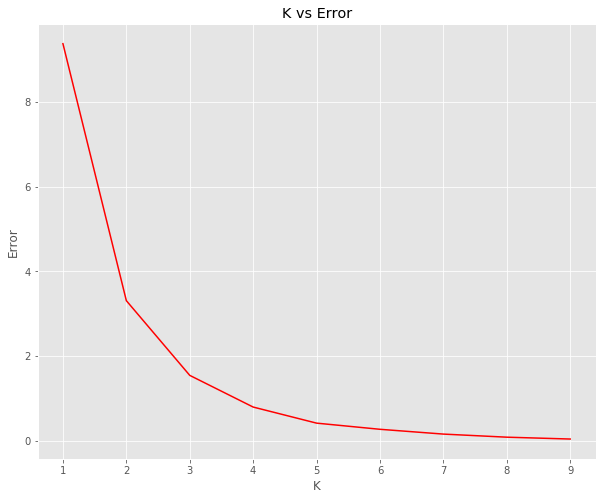

In [420]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(1, 10), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(1, 10))
plt.xlabel("K")
plt.ylabel("Error")

In [539]:
kclusters = 2

to_grouped_clustering = ita.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(to_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int32)

In [540]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = ita.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_
to_merged.head()

,Neighborhoods,Bakery,Café,Dessert Shop,Cluster Labels
0,"Albany, California",0.000000,1.000000,0.000000,0
1,"Berkeley, California",0.000000,1.000000,0.000000,0
2,"Brisbane, California",0.000000,0.909091,0.090909,0
3,"Cupertino, California",1.000000,0.000000,0.000000,1
4,"Dublin, California",0.166667,0.833333,0.000000,0


In [541]:
# merge to add latitude/longitude for each neighborhood
to_merged = to_merged.join(comp.set_index("Neighborhood"), on="Neighborhoods")

print(to_merged.shape)
to_merged.head()

(73, 11)


,Neighborhoods,Bakery,Café,Dessert Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory
0,"Albany, California",0.0,1.0,0.0,0,42.651167,-73.754968,Cider Belly Donuts,42.650487,-73.752350,Café
0,"Albany, California",0.0,1.0,0.0,0,42.651167,-73.754968,Stacks Espresso Bar - Downtown,42.650257,-73.750645,Café
0,"Albany, California",0.0,1.0,0.0,0,42.651167,-73.754968,Prime at the Plaza,42.651442,-73.758315,Café
0,"Albany, California",0.0,1.0,0.0,0,42.651167,-73.754968,Au Bon Pain,42.650290,-73.760900,Café
1,"Berkeley, California",0.0,1.0,0.0,0,37.870839,-122.272864,Tamon Tea,37.870125,-122.269188,Café


In [542]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(73, 11)


,Neighborhoods,Bakery,Café,Dessert Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory
0,"Albany, California",0.000000,1.000000,0.000000,0,42.651167,-73.754968,Cider Belly Donuts,42.650487,-73.752350,Café
7,"Hayward, California",0.000000,0.000000,1.000000,0,37.668821,-122.080796,United Paleteria Y Neveria,37.664945,-122.077943,Dessert Shop
9,"Menlo Park, California",0.000000,1.000000,0.000000,0,37.451967,-122.177993,Cafe Borrone,37.453675,-122.182375,Café
9,"Menlo Park, California",0.000000,1.000000,0.000000,0,37.451967,-122.177993,Menlo Cafe,37.453036,-122.183463,Café
9,"Menlo Park, California",0.000000,1.000000,0.000000,0,37.451967,-122.177993,SRI Cafe,37.455835,-122.175319,Café
10,"Millbrae, California",0.500000,0.000000,0.500000,0,37.598547,-122.387194,Nothing Bundt Cakes,37.597175,-122.385388,Bakery
10,"Millbrae, California",0.500000,0.000000,0.500000,0,37.598547,-122.387194,Tous les Jours,37.595002,-122.385732,Bakery
10,"Millbrae, California",0.500000,0.000000,0.500000,0,37.598547,-122.387194,Sweet Indulgences 甜在深,37.600818,-122.391536,Dessert Shop
12,"Morgan Hill, California",0.000000,1.000000,0.000000,0,37.130408,-121.654497,Grinds Vines Automobilia Cafe,37.128965,-121.653107,Café
14,"Oakland, California",0.000000,0.666667,0.333333,0,37.804456,-122.271356,Lucky Duck Bicycle Cafe,37.801684,-122.268656,Café


In [543]:
#create map

pa_lat = 37.4419; pa_long = -122.1430
map_clusters =  folium.Map(location = [pa_lat, pa_long], zoom_start = 10.7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhoods'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [560]:
ita["Cluster Labels"] = kmeans.labels_
ita.head()

,Neighborhoods,Bakery,Café,Dessert Shop,Cluster Labels
0,"Albany, California",0.000000,1.000000,0.000000,0
1,"Berkeley, California",0.000000,1.000000,0.000000,0
2,"Brisbane, California",0.000000,0.909091,0.090909,0
3,"Cupertino, California",1.000000,0.000000,0.000000,1
4,"Dublin, California",0.166667,0.833333,0.000000,0


In [562]:
objects = (1,2)
y_pos = np.arange(len(objects))
performance = ita['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
print(perf)

[11, 12]


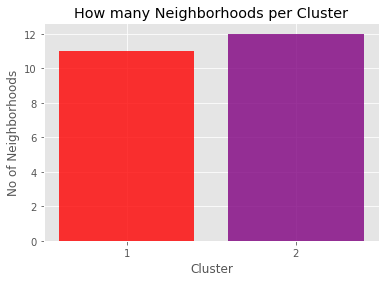

In [563]:
plt.bar(y_pos, perf, align='center', alpha=0.8, color=[ 'red','purple', 'aquamarine', "khaki"])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [547]:
# How many neighborhoods in each cluster
ita['Cluster Labels'].value_counts()

1    12
0    11
Name: Cluster Labels, dtype: int64

## Analysis of each cluster

In [548]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = penn_map_df_sorted[['County', 'Map Name']]
df_new.rename(columns = {"Map Name" : "Neighborhoods"}, inplace=True)
df_new.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,County,Neighborhoods
59,San Mateo,"Pacifica, California"
21,San Mateo,"Daly City, California"
16,San Mateo,"Colma, California"
74,San Mateo,"San Bruno, California"
89,San Mateo,"South San Francisco, California"


In [498]:
#Red

cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]


In [549]:
df_cluster1 = pd.merge(df_new, cluster1, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

df_cluster1

,County,Neighborhoods,Bakery,Café,Dessert Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory
0,Alameda,"Albany, California",0.000000,1.000000,0.000000,0,42.651167,-73.754968,Cider Belly Donuts,42.650487,-73.752350,Café
1,Alameda,"Albany, California",0.000000,1.000000,0.000000,0,42.651167,-73.754968,Stacks Espresso Bar - Downtown,42.650257,-73.750645,Café
2,Alameda,"Albany, California",0.000000,1.000000,0.000000,0,42.651167,-73.754968,Prime at the Plaza,42.651442,-73.758315,Café
3,Alameda,"Albany, California",0.000000,1.000000,0.000000,0,42.651167,-73.754968,Au Bon Pain,42.650290,-73.760900,Café
4,Alameda,"Berkeley, California",0.000000,1.000000,0.000000,0,37.870839,-122.272864,Tamon Tea,37.870125,-122.269188,Café
5,San Mateo,"Brisbane, California",0.000000,0.909091,0.090909,0,-27.468968,153.023499,Chocolate Soldier,-27.469858,153.022752,Café
6,San Mateo,"Brisbane, California",0.000000,0.909091,0.090909,0,-27.468968,153.023499,Brew Cafe & Wine Bar,-27.469072,153.025150,Café
7,San Mateo,"Brisbane, California",0.000000,0.909091,0.090909,0,-27.468968,153.023499,Frankie & George,-27.468974,153.021558,Café
8,San Mateo,"Brisbane, California",0.000000,0.909091,0.090909,0,-27.468968,153.023499,Coffee Iconic,-27.469269,153.021740,Café
9,San Mateo,"Brisbane, California",0.000000,0.909091,0.090909,0,-27.468968,153.023499,Felix for Goodness,-27.469493,153.024300,Café


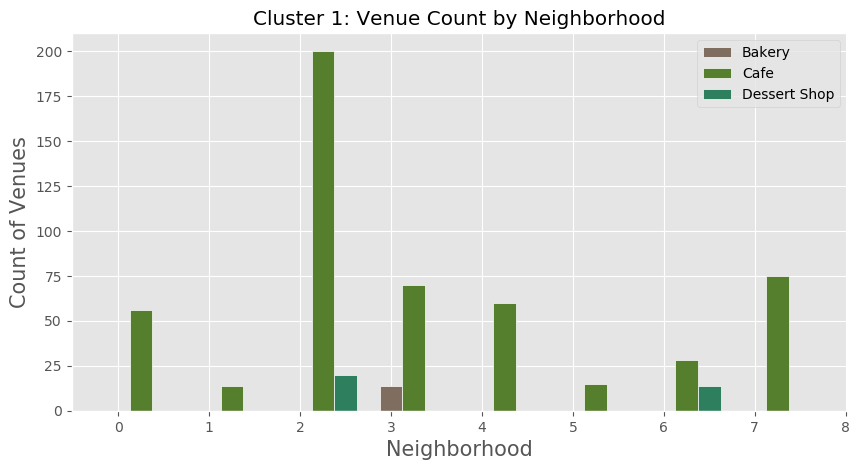

In [601]:
c0 = pd.merge(df_cluster1, data_merge, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10,5), dpi = 100)
# title
plt.title('Cluster 1: Venue Count by Neighborhood')
#set height of bar
bar1 = c0.groupby('Neighborhoods')['Bakery'].sum()
bar2 = c0.groupby('Neighborhoods')['Café'].sum()
bar3 = c0.groupby('Neighborhoods')['Dessert Shop'].sum()

# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + .25 for x in r1]
r3 = [x + .25 for x in r2]
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Count of Venues', fontsize=15)

# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width= 0.25, edgecolor='white', label='Bakery')
plt.bar(r2, bar2, color='#557f2d',  width= 0.25, edgecolor='white', label='Cafe')
plt.bar(r3, bar3, color='#2d7f5e',  width= 0.25, edgecolor='white', label='Dessert Shop')


#legend
plt.legend()
plt.show()


In [550]:
# Purple
cluster2 = to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

df_cluster2

,County,Neighborhoods,Bakery,Café,Dessert Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory
0,Santa Clara,"Cupertino, California",1.000000,0.0,0.000000,1,37.322893,-122.032290,Paris Baguette,37.323721,-122.035521,Bakery
1,Santa Clara,"Cupertino, California",1.000000,0.0,0.000000,1,37.322893,-122.032290,Boudin SF,37.322577,-122.034496,Bakery
2,Alameda,"Emeryville, California",1.000000,0.0,0.000000,1,37.831409,-122.286527,Panera Bread,37.829180,-122.287851,Bakery
3,Alameda,"Emeryville, California",1.000000,0.0,0.000000,1,37.831409,-122.286527,Starter Bakery,37.829328,-122.290444,Bakery
4,Alameda,"Fremont, California",1.000000,0.0,0.000000,1,37.548270,-121.988572,Nothing Bundt Cakes,37.546742,-121.987660,Bakery
5,Alameda,"Fremont, California",1.000000,0.0,0.000000,1,37.548270,-121.988572,Amia Bakery,37.545465,-121.987626,Bakery
6,Alameda,"Livermore, California",0.500000,0.5,0.000000,1,37.682058,-121.768053,Casse-Croute Bakery,37.682567,-121.768746,Bakery
7,Alameda,"Livermore, California",0.500000,0.5,0.000000,1,37.682058,-121.768053,Story Coffee Co.,37.679797,-121.771807,Café
8,Santa Clara,"Milpitas, California",0.250000,0.5,0.250000,1,37.428272,-121.906624,Sea Link Cafe,37.427921,-121.906359,Café
9,Santa Clara,"Milpitas, California",0.250000,0.5,0.250000,1,37.428272,-121.906624,Paris Baguette,37.428056,-121.911390,Bakery


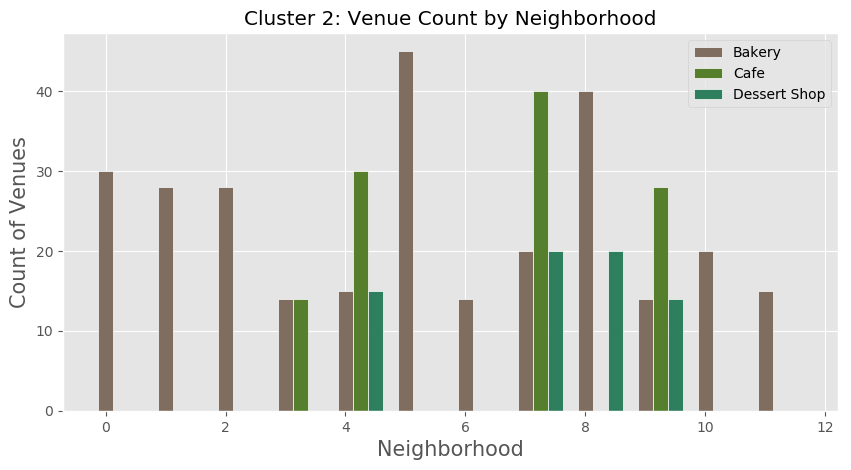

In [602]:
c1 = pd.merge(df_cluster2, data_merge, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10,5), dpi = 100)
# title
plt.title('Cluster 2: Venue Count by Neighborhood')
#set height of bar
bar1 = c1.groupby('Neighborhoods')['Bakery'].sum()
bar2 = c1.groupby('Neighborhoods')['Café'].sum()
bar3 = c1.groupby('Neighborhoods')['Dessert Shop'].sum()

# Set position of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + .25 for x in r1]
r3 = [x + .25 for x in r2]
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Count of Venues', fontsize=15)

# Make the plot
plt.bar(r1, bar1, color='#7f6d5f', width= 0.25, edgecolor='white', label='Bakery')
plt.bar(r2, bar2, color='#557f2d',  width= 0.25, edgecolor='white', label='Cafe')
plt.bar(r3, bar3, color='#2d7f5e',  width= 0.25, edgecolor='white', label='Dessert Shop')


#legend
plt.legend()
plt.show()


In [569]:
# The code was removed by Watson Studio for sharing.

,County,Neighborhoods,Bakery,Café,Dessert Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory


In [570]:
# The code was removed by Watson Studio for sharing.

,County,Neighborhoods,Bakery,Café,Dessert Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory


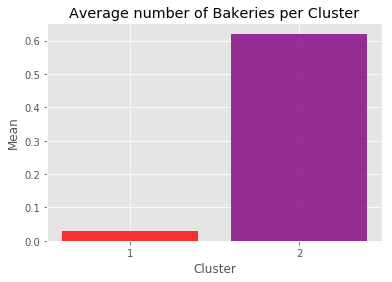

In [571]:
clusters_mean_bakery = [df_cluster1['Bakery'].mean(),df_cluster2['Bakery'].mean()]
objects = (1,2)
y_pos = np.arange(len(objects))
perf = clusters_mean_bakery
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'khaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Bakeries per Cluster')

plt.show()

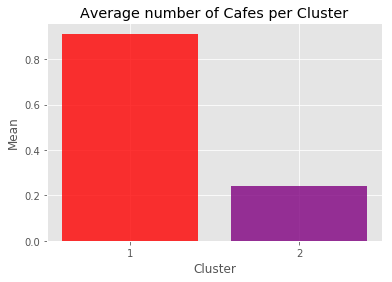

In [572]:
clusters_mean_cafe = [df_cluster1['Café'].mean(),df_cluster2['Café'].mean()]
objects = (1,2)
y_pos = np.arange(len(objects))
perf = clusters_mean_cafe
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', "khaki"])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Cafes per Cluster')

plt.show()

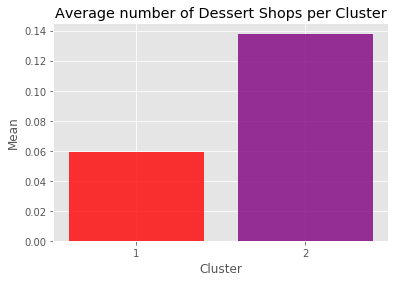

In [573]:
clusters_mean_dessert = [df_cluster1['Dessert Shop'].mean(),df_cluster2['Dessert Shop'].mean()]
objects = (1,2)
y_pos = np.arange(len(objects))
perf = clusters_mean_dessert
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', "khaki"])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Dessert Shops per Cluster')

plt.show()

From the analysis of the average number of Bakeries, Cafes, and Dessert Shops in each cluster, I have determined that cluster 1 would have the best cities to opn a cookie shop in. Cluster 1 has the lowest average of bakeries and dessert shops, which are the two most competitive venue categories.

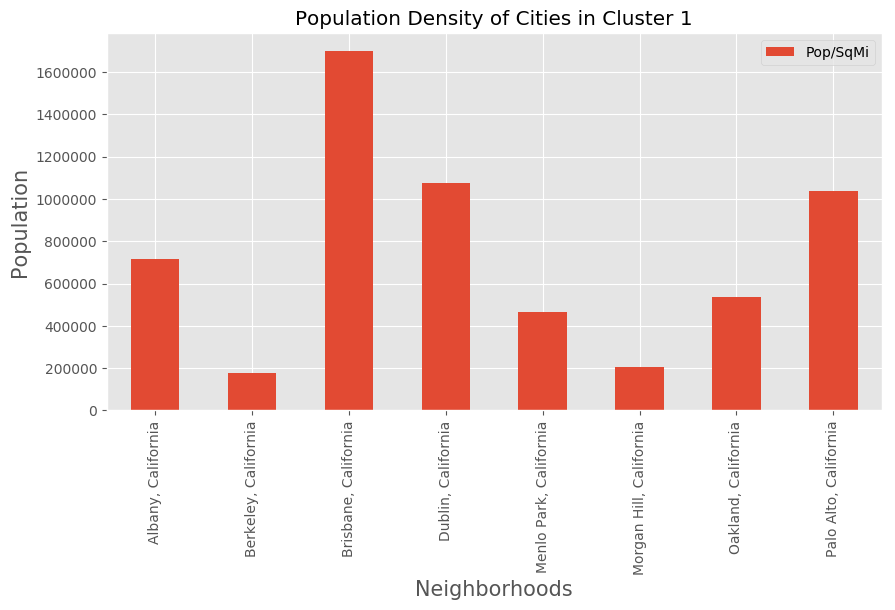

In [556]:
c1_cities = pd.merge(df_cluster1, data_merge, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10,5), dpi = 100)
# title
plt.title('Population Density of Cities in Cluster 1')
#On x-axis
plt.xlabel('County', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
c1_cities.groupby('Neighborhoods')['Pop/SqMi'].sum().plot(kind='bar')
#legend
plt.legend()
plt.show()


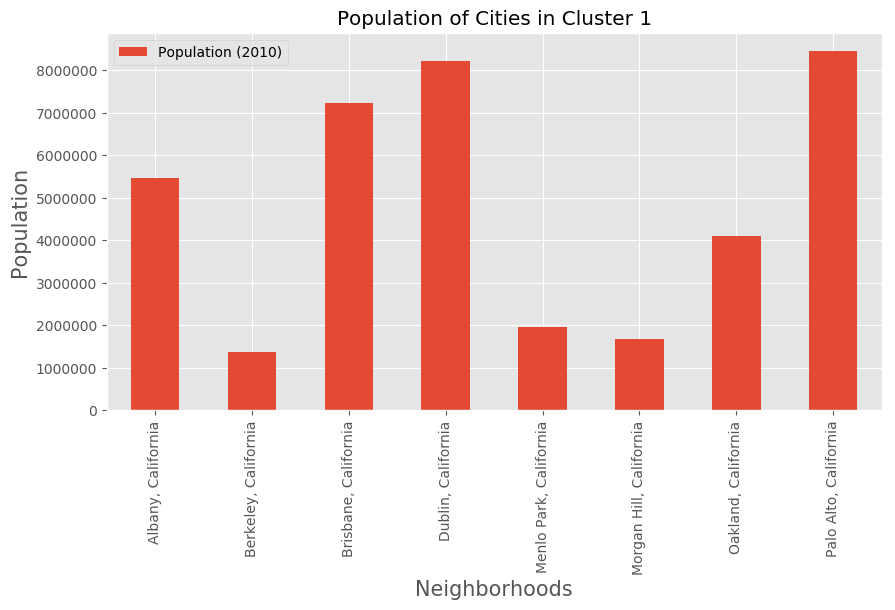

In [557]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10,5), dpi = 100)
# title
plt.title('Population of Cities in Cluster 1')
#On x-axis
plt.xlabel('County', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
c1_cities.groupby('Neighborhoods')['Population (2010)'].sum().plot(kind='bar')
#legend
plt.legend()
plt.show()
